In [43]:
import keras
import matplotlib.pyplot as plt

In [44]:
from keras.datasets import mnist

In [45]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

In [46]:
def check_train_test():
    print('x_train : ',x_train.shape)
    print('y_train : ',y_train.shape)
    print('x_test : ',x_test.shape)
    print('y_test : ',y_test.shape)

In [47]:
check_train_test()

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test :  (10000, 28, 28)
y_test :  (10000,)


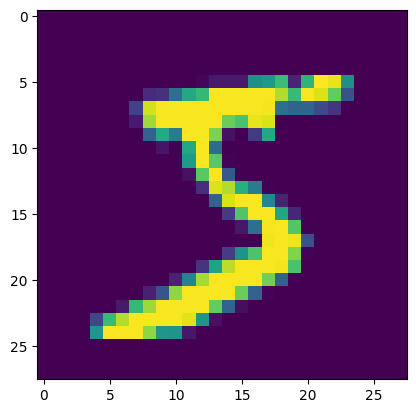

In [48]:
#plot x_train[0] first number index[0]
plt.imshow(x_train[0])

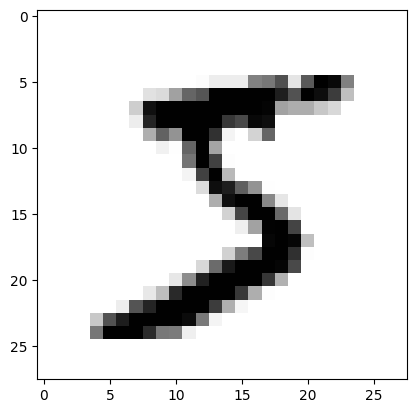

In [49]:
#black and white
plt.imshow(x_train[0] , cmap=plt.cm.binary)

In [50]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [51]:
#divide by 255 because we want more accuracy 0-1
x_train = x_train/255
x_test = x_test/255

In [52]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [53]:
from keras.models import Sequential
from keras.layers import Flatten , Dense

In [54]:
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(128 , activation="relu")) # amount of node or neural , hidden layer 1
model.add(Dense(128 , activation="relu")) # hidden layer 2
model.add(Dense(10 , activation="softmax"))

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(loss="sparse_categorical_crossentropy" , optimizer="adam" , metrics="accuracy")

In [57]:
model.fit(x_train , y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 610us/step - loss: 0.2224 - accuracy: 0.9349
Epoch 2/5
1875/1875 [==============================] - 1s 620us/step - loss: 0.0950 - accuracy: 0.9704
Epoch 3/5
1875/1875 [==============================] - 1s 608us/step - loss: 0.0663 - accuracy: 0.9794
Epoch 4/5
1875/1875 [==============================] - 1s 624us/step - loss: 0.0520 - accuracy: 0.9827
Epoch 5/5
1875/1875 [==============================] - 1s 627us/step - loss: 0.0391 - accuracy: 0.9867


In [58]:
run_model = keras.models.load_model("mnist.model")

In [59]:
run_model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 387us/step - loss: 26.1161 - accuracy: 0.9095


[26.116071701049805, 0.909500002861023]

In [60]:
predict_pp = run_model.predict([x_test])

313/313 [==============================] - 0s 353us/step


In [61]:
predict_pp[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [62]:
import numpy as np
np.argmax(predict_pp[0])

7

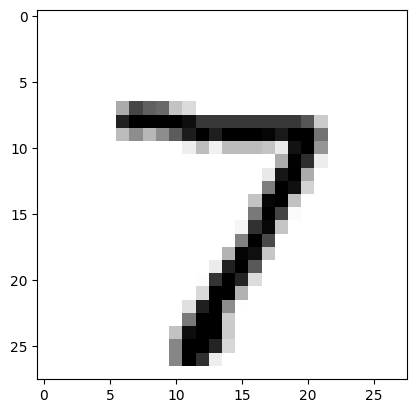

In [63]:
plt.imshow(x_test[0], cmap=plt.cm.binary)